In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Data Wrangling
df = pd.read_csv('C:/Users/HP/AppData/Local/Programs/Python/Python39/Scripts/dataset/international_matches.csv')  #Uses the pandas library to read a CSV 
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(23921, 25)

In [24]:
df.info()                #provides information about the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [25]:
df['date']=pd.to_datetime(df['date']) 
df                #converts the 'date' column in the DataFrame 'df' to a datetime format using the pd.to_datetime function.

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [27]:
#Exploratory Data Analysis
fifa_rank = df[['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank','away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team':'team', 'home_team_fifa_rank':'rank','home_team_total_fifa_points':'rank_points'})
away = fifa_rank[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team':'team', 'away_team_fifa_rank':'rank','away_team_total_fifa_points':'rank_points'})
fifa_rank = pd.concat([home, away], ignore_index=True)


fifa_rank = fifa_rank.sort_values(['team','date'],ascending = [True,False])
fifa_rank['row_number']= fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')

#5 Strongest teams
fifa_rank_top       #the code prepares and extracts information related to the FIFA rankings of teams, 
                    #and then identifies the top 10 teams based on their latest ranking.

,date,team,rank,rank_points
47681,2022-06-06,Brazil,1,1832
47830,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
47828,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
47788,2022-06-12,Portugal,8,1674
47824,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [28]:
#Checking Null Values
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'columns contain\'null\' values : \n\n (columns_contains_null)')  #code identifies and prints the columns in the DataFrame 'df' that contain null (missing) values.

columns contain'null' values : 

 (columns_contains_null)


In [29]:
wc_2022 = ['Qatar','Ecuador','Senegal','Netherland','England','Iran','USA','Wales','Argentina','Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Tunisia','Spain','Costaa Rica','Germany','Japan','Belgium','Canada','Morocco','Croatia','Brazil','Serbia','Switzerland','Cameroon','Portugal','Ghana','Uruguay','South Korea']

In [30]:
for x in wc_2022:              # Iterate over values in wc_2022 list
    for y in columns_contains_null:
        df[y].fillna(df[df[y[0:9]]== x][y].mean(), inplace = True)   # Iterate over columns with null values
                                                                     # Fill null values in column y with the mean of non-null values
                                                                     # where the column y starts with the value x from wc_2022.

In [31]:
#Q1 - Is there such a thing as home team advantage?
home_team = df[['country','home_team_score','away_team_score']]
home_team.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [32]:
home_team['home_team_score']>home_team['away_team_score']
home_wins = home_team.loc[home_team['home_team_score']>home_team['away_team_score']]       #.loc[] function is used to filter rows from the DataFrame home_team based on the boolean condition. 
home_wins                                                                                 #home_wins is a new DataFrame that contains only the rows from home_team where the home team scored more goals than the away team,
                                                                                          #indicating victories for the home teams.

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0
...,...,...,...
23908,Netherlands,3,2
23912,Bosnia and Herzegovina,3,2
23915,Turkey,2,0
23916,Moldova,2,1


In [33]:
home_team['home_team_score']<home_team['away_team_score']
home_loss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']]
home_loss

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1
...,...,...,...
23909,Poland,0,1
23910,Armenia,1,4
23913,Romania,0,3
23917,Liechtenstein,0,2


In [38]:
home_ad = home_wins[['country','home_team_score','away_team_score']].rename(columns={'home_team_score': 'home_team_win', 'away_team_score': 'home_team_loss'})
away_ad = home_loss[['country','home_team_score','away_team_score']].rename(columns={'home_team_score': 'home_team_win', 'away_team_score': 'home_team_loss'})

# Check the types of home_ad and away_ad
print(type(home_ad))
print(type(away_ad))

# If they are both DataFrames, you can use concat to concatenate them
home_advantage = pd.concat([home_ad, away_ad], ignore_index=True)
home_advantage.head()



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,country,home_team_win,home_team_loss
0,Bolivia,3,1
1,Ecuador,5,0
2,Guinea,1,0
3,Zimbabwe,2,0
4,Guinea,4,0


In [40]:
# home_advantage.mean().plot(kind = 'pie',title= 'Home Advantage vs Home Team Loss', labels = ['home_team_wins','home_team_loss'],figsize = (6,6))
# plt.legend();

In [41]:
#Q2 - Which team has the most wins?

hometeam = df[['date','home_team','home_team_score','away_team_score']]

hometeam.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [42]:
hometeam['home_team_score']>hometeam['away_team_score']
home_wins = hometeam.loc[home_team['home_team_score']>hometeam['away_team_score']]
home_wins.head()

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0


In [43]:
hometeam['home_team_score']<hometeam['away_team_score']
home_loss = hometeam.loc[home_team['home_team_score']<hometeam['away_team_score']]
home_loss.head()

,date,home_team,home_team_score,away_team_score
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2
26,1993-08-31,Iceland,0,1


In [45]:
hometeam_wins = home_wins[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(columns={'home_team': 'team', 'home_team_score': 'home_team_win', 'away_team_score': 'away_team_win'})
awayteam_wins = home_loss[['date', 'home_team', 'home_team_score', 'away_team_score']].rename(columns={'home_team': 'team', 'home_team_score': 'home_team_win', 'away_team_score': 'away_team_win'})

# Check the types of hometeam_wins and awayteam_wins
print(type(hometeam_wins))
print(type(awayteam_wins))

# If they are both DataFrames, you can use concat to concatenate them
team_streak = pd.concat([hometeam_wins, awayteam_wins], ignore_index=True)
team_streak

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,date,team,home_team_win,away_team_win
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Ecuador,5,0
2,1993-08-08,Guinea,1,0
3,1993-08-08,Zimbabwe,2,0
4,1993-08-09,Guinea,4,0
...,...,...,...,...
18209,2022-06-14,Poland,0,1
18210,2022-06-14,Armenia,1,4
18211,2022-06-14,Romania,0,3
18212,2022-06-14,Liechtenstein,0,2


In [46]:
team_streak['team'].value_counts().nlargest(1)  # identifies the team with the highest count, 
                                                 #indicating the team that appears most frequently in the 'team' column of the team_streak DataFrame.

team
USA    253
Name: count, dtype: int64

In [47]:
#Q3 - What is the winning percentage comparing when the highest-ranked team plays against the lowest-ranked team?

def victory(team1, team2, team1_rank, team2_rank, team1_score, team2_score):
    if team1_score > team2_score:
        winner = team1
    
    elif team1_score == team2_score:
        winner = 'Drawn'
    
    else:
        winner = team2
    
    return winner

In [48]:
df['winner']= df .apply(lambda x: victory(x['home_team'], x['away_team'], x['home_team_fifa_rank'], x['away_team_fifa_rank']
                                          , x['home_team_score'], x['away_team_score']), axis=1)

In [49]:
def rank(home,away,rank_home,rank_away):
    if rank_home < rank_away:
        return home
    else:
        return away

In [50]:
df['better_rank'] = df.apply(lambda x: rank(x['home_team'], x['away_team'], 
                                            x['home_team_fifa_rank'],x['away_team_fifa_rank'])
                             , axis=1)

In [51]:
def result_rank(winner,better_rank):
    if winner == 'Drawn':
        return winner
    if winner == better_rank:
        return 'Highest'
    else:
        return 'Smallest'

In [52]:
df['result_rank']= df.apply(lambda x: result_rank(x['winner'], x['better_rank']), axis = 1)

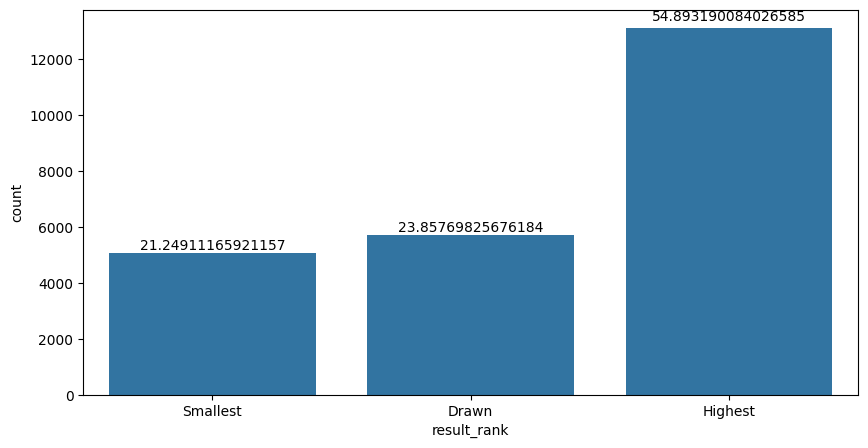

In [53]:
plt.figure(figsize = (10,5))
total = float(len(df))
ax = sns.countplot(x = 'result_rank', data=df)
for p in ax.patches :
    percentage = format(100*p.get_height()/total)
    
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x+width/2, y+height*1.02), ha='center')
    
plt.show()

In [54]:
#Q4 - What is the winning percentage comparing when the highest attack rank plays against the lowest attack rank?

df_rank_attack = df[df['home_team_mean_offense_score'].notnull()]

In [55]:
df_rank_attack = df[df['away_team_mean_offense_score'].notnull()]

In [56]:
def rank_attack(home,away,rank_home,rank_away):
    if rank_home > rank_away:
        return home
    else:
        return away

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [58]:
df_rank_attack['better_attack']= df.apply(lambda x: rank_attack(x['home_team'], x['away_team'], x['home_team_mean_offense_score']
                                                                , x['away_team_mean_offense_score']), axis= 1)

In [59]:
df_rank_attack['result_attack'] = df_rank_attack.apply(lambda x: result_rank(x['winner'], x['better_attack']), axis =1)

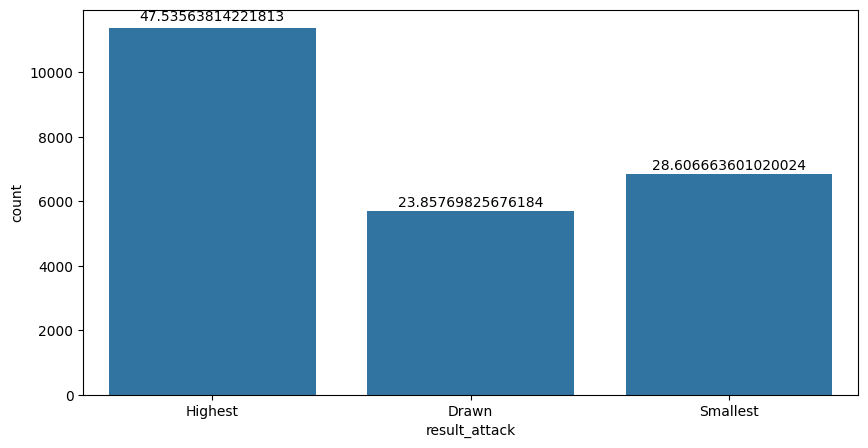

In [60]:
plt.figure(figsize = (10,5))
total = float(len(df_rank_attack))
ax = sns.countplot(x= 'result_attack', data = df_rank_attack)
for p in ax.patches:
    percentage = format(100*p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha = 'center')
plt.show()

In [61]:
#Do teams with stronger offensive scores have more goals?

offense_score = []
for x in wc_2022:
    of_score = np.round((df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2, 2)
    offense_score.append(of_score)
offense_score = pd.DataFrame({'Team' : wc_2022, 'Of score': offense_score}).sort_values('Of score', ascending = False).reset_index(drop = True)
offense_score.index += 1
offense_score

,Team,Of score
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Portugal,81.81
5,England,81.69
6,Brazil,81.68
7,Uruguay,80.55
8,Germany,80.43
9,Belgium,79.48
10,Croatia,78.42


In [62]:
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []
for team in wc_2022:
    gch = df[df['home_team']==team]['away_team_score'].sum()
    gsh = df[df['home_team']==team]['home_team_score'].sum()
    gca = df[df['away_team']==team]['home_team_score'].sum()
    gsa = df[df['away_team']==team]['away_team_score'].sum()
    
    
    tgc = np.add(gch,gca)
    tgs = np.add(gsh,gsa)
    
    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)
    
    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)
    
goals = pd.DataFrame({'Team':wc_2022,'Scored goals home':goals_scored_home,'Scored goals away':goals_scored_away,'Conceded goals home':goals_conceded_home,'Conceded goals away':goals_conceded_away ,'Total scored goals':total_goals_scored,'Total conceded goals':total_goals_conceded})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals']/ goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending = False).reset_index(drop = True)
goals.index += 1
goals

,Team,Scored goals home,Scored goals away,Conceded goals home,Conceded goals away,Total scored goals,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558,396,141,159,954,300,654,3.180000
2,Spain,469,312,107,141,781,248,533,3.149194
3,Germany,544,331,220,171,875,391,484,2.237852
4,France,447,223,154,112,670,266,404,2.518797
5,Portugal,424,244,124,144,668,268,400,2.492537
6,England,384,246,132,119,630,251,379,2.509960
7,Japan,533,243,273,153,776,426,350,1.821596
8,Mexico,572,286,272,247,858,519,339,1.653179
9,Australia,435,194,127,164,629,291,338,2.161512
10,Argentina,379,278,140,192,657,332,325,1.978916


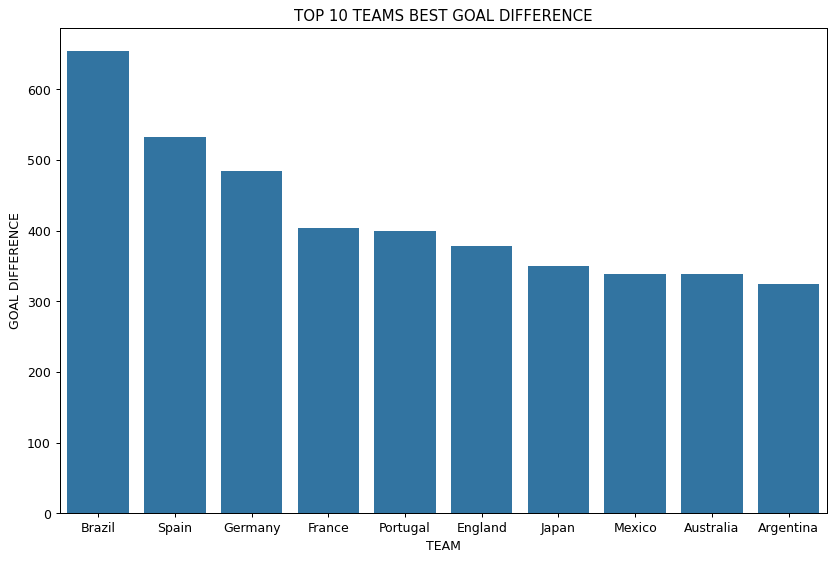

In [63]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goals[:10], x='Team', y='Goal difference')
plt.xlabel('TEAM')
plt.ylabel('GOAL DIFFERENCE')
plt.title('TOP 10 TEAMS BEST GOAL DIFFERENCE');

In [76]:
# #Top 10 Strongest Offensive Team
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = pd.concat([hometeam_wins, awayteam_wins], ignore_index=True)
# Sort and get the top offensive teams
offense = offense.sort_values(['team', 'date'], ascending=[True, False])
offense['row_number'] = offense.groupby('team').cumcount() + 1

# Check the available column names in the 'offense' DataFrame
print(offense.columns)

# Replace 'correct_column_name' with the actual column name in the next line
offense_top_data = offense[offense['row_number'] == 1].drop('row_number', axis=1).nlargest(10, 'home_team_win')

# Display the top offensive teams

offense_top_data




Index(['date', 'team', 'home_team_win', 'away_team_win', 'row_number'], dtype='object')


,date,team,home_team_win,away_team_win
10370,2019-07-18,American Samoa,8,1
11030,2021-07-02,Bermuda,8,1
11576,2022-06-14,Indonesia,7,0
11259,2021-11-15,Niger,7,2
11532,2022-06-08,Belgium,6,1
11584,2022-06-14,Haiti,6,0
11560,2022-06-12,Puerto Rico,6,0
11224,2021-11-11,Russia,6,0
11505,2022-06-05,Argentina,5,0
11585,2022-06-14,Germany,5,2


In [82]:
# #Top 10 Strongest Defensive Teams?

defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = pd.concat([hometeam_wins, awayteam_wins], ignore_index=True)
# Sort and get the top defensive teams
defense = defense.sort_values(['team', 'date'], ascending=[True, False])
defense['row_number'] = defense.groupby('team').cumcount() + 1

# Check the available column names in the 'defense' DataFrame
print(defense.columns)

# Replace 'defense_score' with the actual column name in the next line
defense_top_data = defense[defense['row_number'] == 1].drop('row_number', axis=1).nlargest(10, 'home_team_win')

# Display the top defensive teams
defense_top_data


Index(['date', 'team', 'home_team_win', 'away_team_win', 'row_number'], dtype='object')


,date,team,home_team_win,away_team_win
10370,2019-07-18,American Samoa,8,1
11030,2021-07-02,Bermuda,8,1
11576,2022-06-14,Indonesia,7,0
11259,2021-11-15,Niger,7,2
11532,2022-06-08,Belgium,6,1
11584,2022-06-14,Haiti,6,0
11560,2022-06-12,Puerto Rico,6,0
11224,2021-11-11,Russia,6,0
11505,2022-06-05,Argentina,5,0
11585,2022-06-14,Germany,5,2


In [86]:
# #Top 10 Team that have Best Midfielder?
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield[['date', 'home_team', 'home_team_mean_midfield_score']].rename(columns={'home_team': 'team', 'home_team_mean_midfield_score': 'midfield_score'})
away = midfield[['date', 'away_team', 'away_team_mean_midfield_score']].rename(columns={'away_team': 'team', 'away_team_mean_midfield_score': 'midfield_score'})

midfield = pd.concat([home, away], ignore_index=True)

# Sorting by team and date
midfield = midfield.sort_values(['team', 'date'], ascending=[True, False])

# Adding row numbers for each team
midfield['row_number'] = midfield.groupby('team').cumcount() + 1

# Selecting the top data for each team
midfield_top_data = midfield[midfield['row_number'] == 1].drop('row_number', axis=1).nlargest(10, 'midfield_score')

# Display the top midfield teams
midfield_top_data


,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
47830,2022-06-14,Belgium,85.5
47681,2022-06-06,Brazil,85.5
47828,2022-06-14,Italy,84.5
47788,2022-06-12,Portugal,84.5
47806,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


In [91]:
#Top 10 Team which have strongest Defender, midfielder, offenser?

df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['diff_total_score'] = df['home_total_score'] - df['away_total_score']

In [92]:
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score[['date', 'home_team', 'home_total_score']].rename(columns={'home_team': 'team', 'home_total_score': 'total_score'})
away = total_score[['date', 'away_team', 'away_total_score']].rename(columns={'away_team': 'team', 'away_total_score': 'total_score'})
total_score = pd.concat([home, away], ignore_index=True)

# Sorting by team and date
total_score = total_score.sort_values(['team', 'date'], ascending=[True, False])

# Adding row numbers for each team
total_score['row_number'] = total_score.groupby('team').cumcount() + 1

# Selecting the top data for each team
total_score_top_10 = total_score[total_score['row_number'] == 1].drop('row_number', axis=1).nlargest(10, 'total_score')

# Display the top teams by total score
total_score_top_10


,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
47681,2022-06-06,Brazil,85.533333
47788,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
47828,2022-06-14,Italy,84.666667
47830,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


In [93]:
#Machine Learning
#Simulation

# feature generation
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # take draw as lost
df['is_stake'] = df['tournament'] != 'Friendly'

In [95]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.2/9.3 MB 6.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/9.3 MB 6.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.3 MB 6.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.3 MB 6.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.3 MB 6.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.3 MB 6.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.3 MB 7.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.3 MB 7.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.3 MB 6.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.3 MB 7.0 MB/s eta 0:00:01
   -------------- -

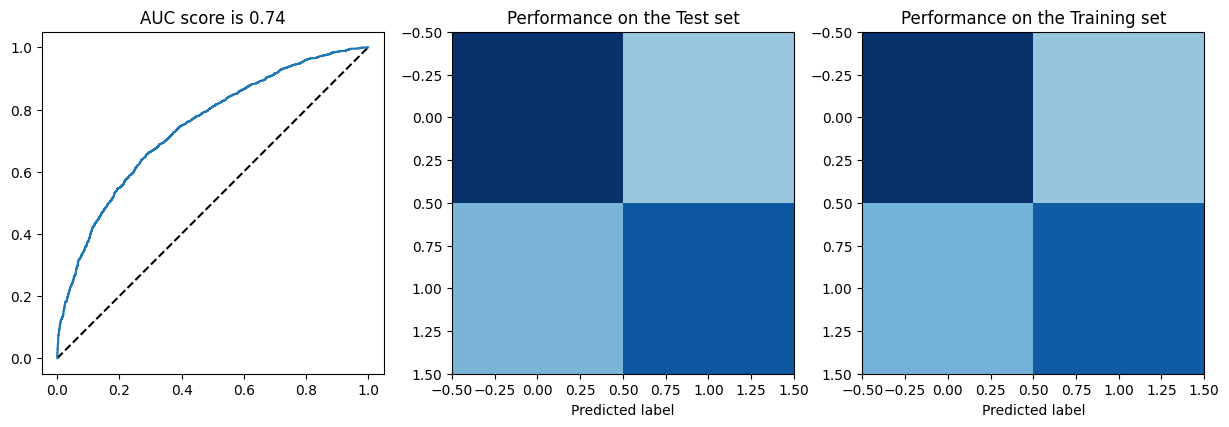

In [96]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference','is_stake']], df['is_won']
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [97]:
#List of all Teams in 2022 World Cup
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [98]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [99]:
#The idea is to separete the performance of each Team as Home or Away.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [100]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Japan', 'Mexico', 'Morocco', 'Netherlands',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [102]:
pip install tqdm



     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00


In [103]:
from tqdm import tqdm #SHOW TASK BAR

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:17<00:00, 12.92it/s]


In [104]:
#Counter is used to easily count recurrent elements in a list 
from collections import Counter

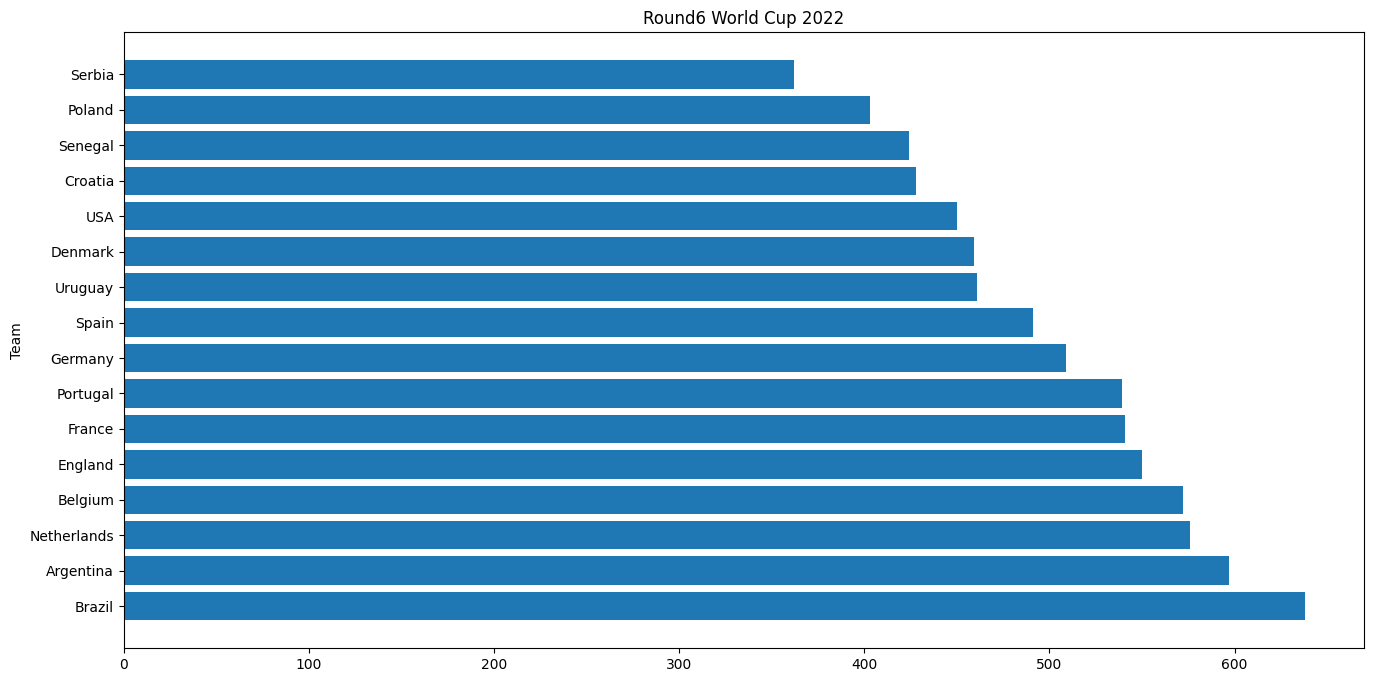

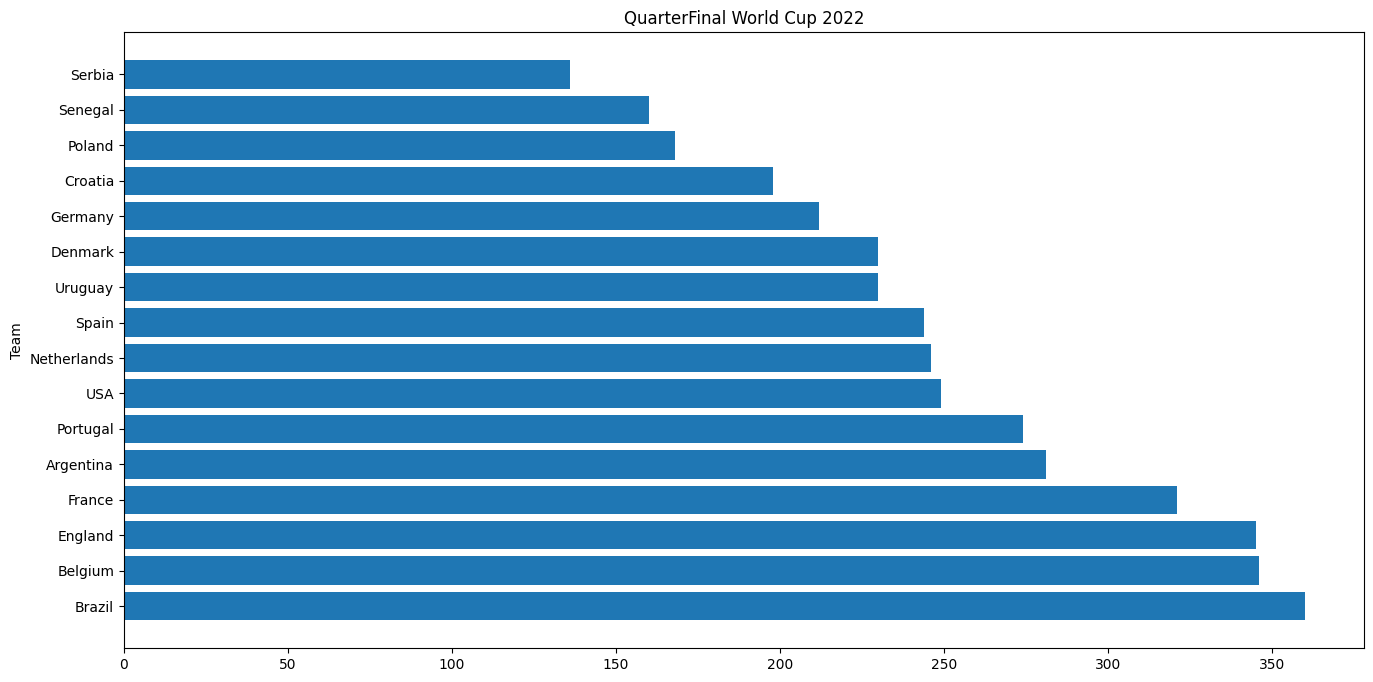

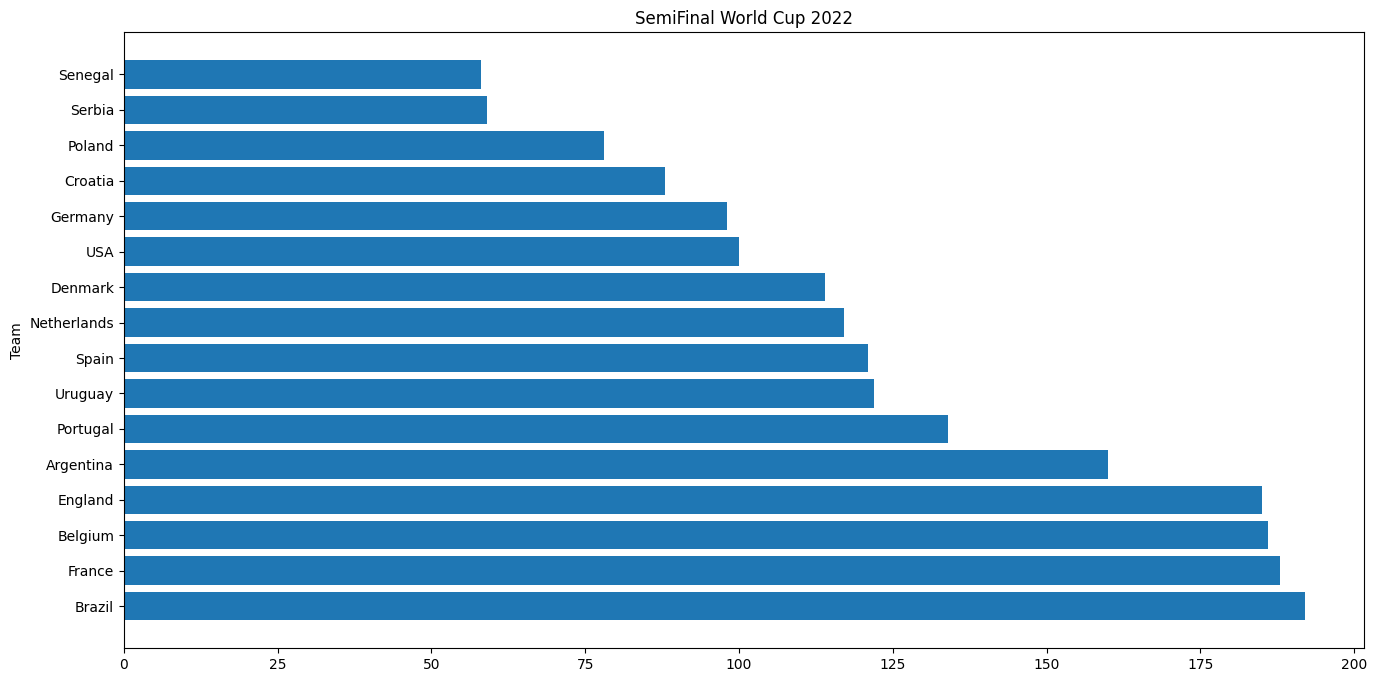

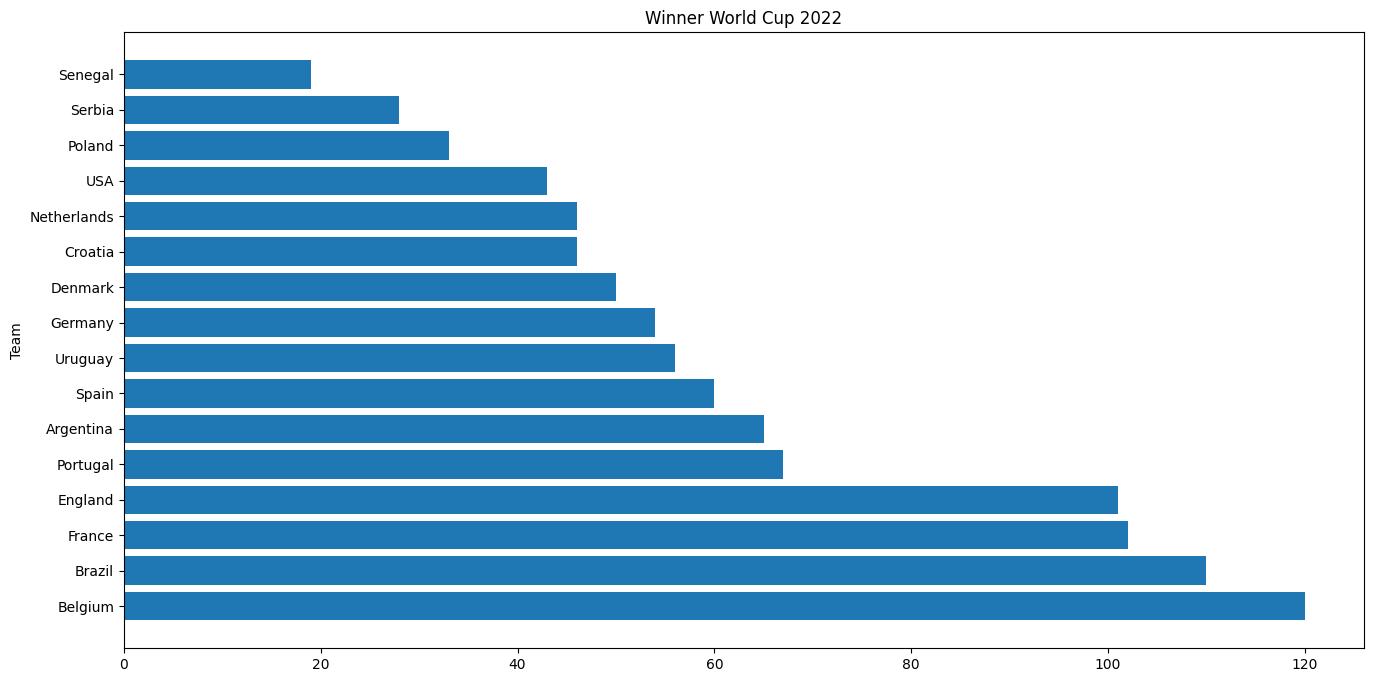

In [105]:
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y)

    ax.set_ylabel('Team')

    if i == simulation_results_round16:
        ax.set_title('Round6 World Cup 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('QuarterFinal World Cup 2022')
    if i == simulation_results_semifinal:
        ax.set_title('SemiFinal World Cup 2022')
    if i == simulations_winners:
        ax.set_title('Winner World Cup 2022')

        
    plt.show()

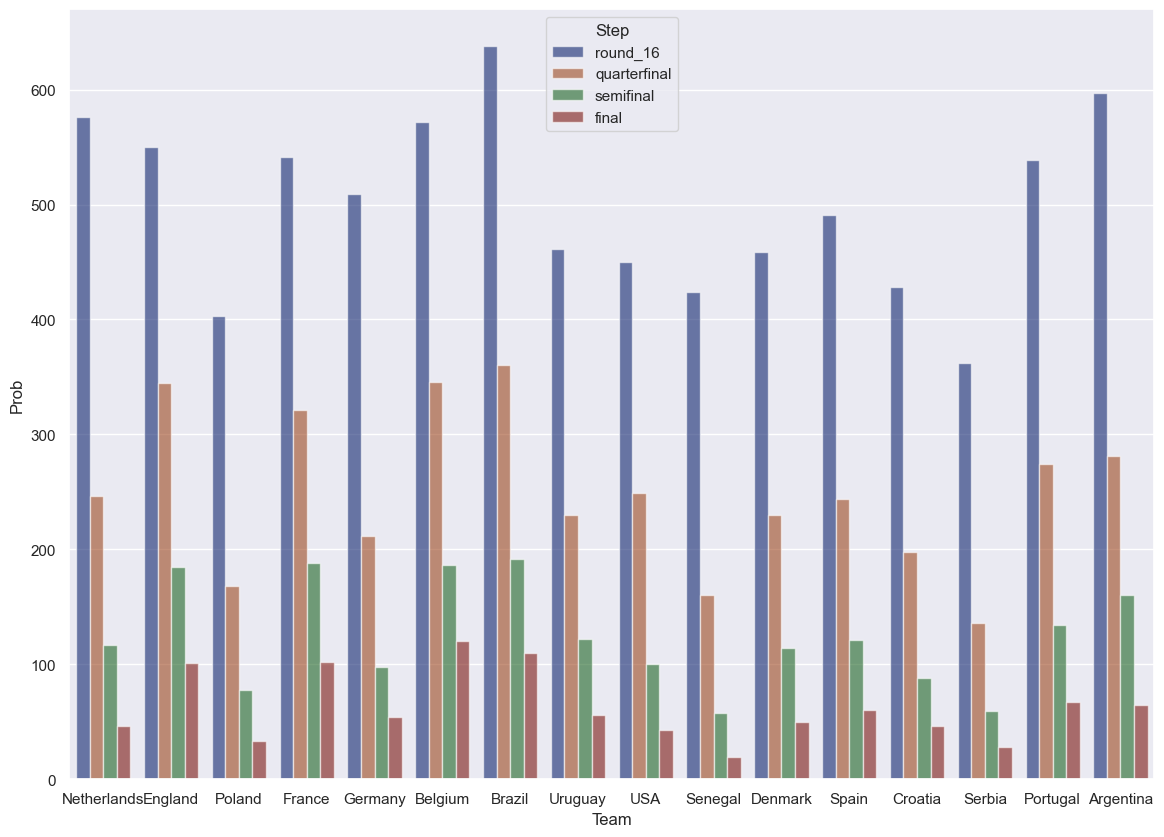

In [106]:
#Join all data in onw single view
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,10)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

In [54]:
#Winner Prediction of World Cup 2022 is Brazil

Interpretation :
1. France has most win-rate in round-16 until semi-final World Cup 2022
2. Senegal and Serbia most likely the weakest teams, for less appearence in Finals;
3. Top 3 Teams are Brazil, Belgium and France with more than 10% chances of winning the tournment.
4. Team which has most win chance to win the world cup 2022 is Brazil